In [1]:
# %pip install tensorflow

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras


ModuleNotFoundError: No module named 'tensorflow'

In [3]:
# %pip install kagglehub
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hsankesara/flickr-image-dataset")

print("Path to dataset files:", path)

  7%|▋         | 621M/8.16G [00:59<12:26, 10.9MB/s]   


KeyboardInterrupt: 

In [ ]:
import os
# List the files in the dataset directory
print("Files in the dataset directory:", os.listdir(path))

Files in the dataset directory: ['flickr30k_images']


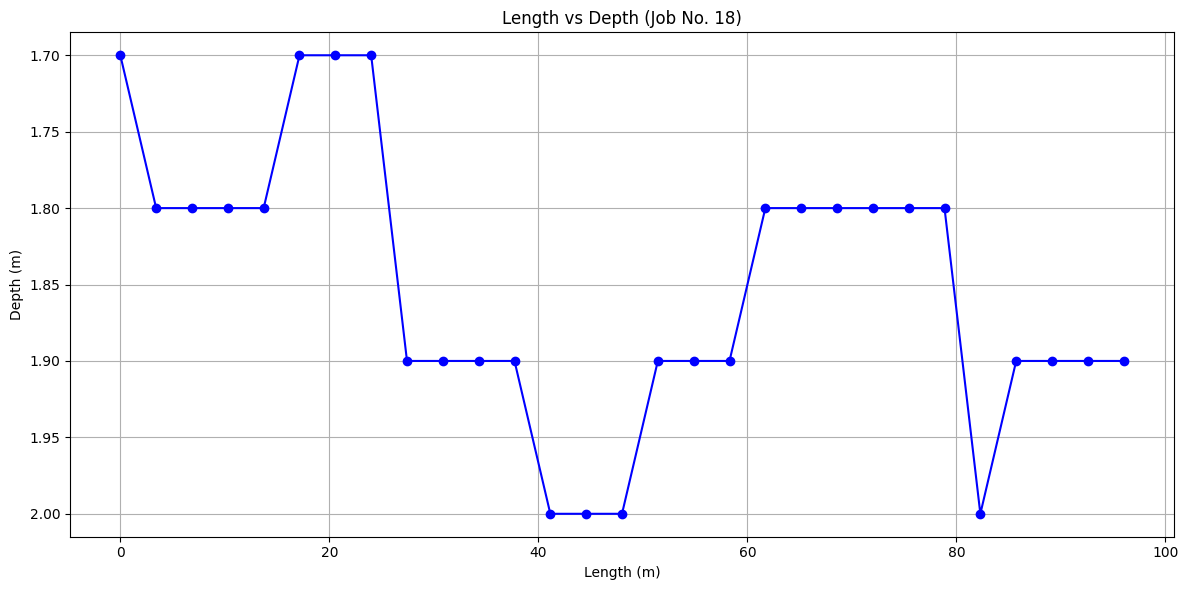

In [4]:
import matplotlib.pyplot as plt

# Rod numbers (representing length in meters; 1 rod = 3.2 m approx for 96m total)
rod_numbers = list(range(29))  # 0 to 28 rods
depths = [
    1.70, 1.80, 1.80, 1.80, 1.80, 1.70, 1.70, 1.70, 1.90, 1.90,
    1.90, 1.90, 2.00, 2.00, 2.00, 1.90, 1.90, 1.90, 1.80, 1.80,
    1.80, 1.80, 1.80, 1.80, 2.00, 1.90, 1.90, 1.90, 1.90
]

# Assuming uniform length intervals: total 96m / 29 rods ≈ 3.31 m per rod
lengths = [i * (96 / 28) for i in rod_numbers]

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(lengths, depths, marker='o', linestyle='-', color='blue')
plt.gca().invert_yaxis()  # Depth increases downward
plt.grid(True)
plt.title("Length vs Depth (Job No. 18)")
plt.xlabel("Length (m)")
plt.ylabel("Depth (m)")
plt.tight_layout()

# Show the plot
plt.show()
